# Decision tree classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution.

## 1. Data acquisition

### 1.1. Load

In [29]:
import pandas as pd

# Load the data from the URL
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.2. Train-test split

In [30]:
from sklearn.model_selection import train_test_split

# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

## 2. EDA

### 2.1. Features

In [31]:
# Inspect the training features' data types
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [32]:
def find_columns_with_most_zeroes(data_df):

    zero_counts = (data_df == 0).sum()

    sorted_zero_counts = zero_counts.sort_values(ascending=False)

    return sorted_zero_counts

sorted_zero_counts = find_columns_with_most_zeroes(data_df)
print("Columns with the most zeroes:")
print(sorted_zero_counts)

Columns with the most zeroes:
Outcome                     500
Insulin                     374
SkinThickness               227
Pregnancies                 111
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


All of the features are already numeric - we don't need to do anything for the model to run. Let's check the labels too.

### 2.2. Labels

In [34]:
training_labels.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


Also already numeric - we can move right to training the model and setting a baseline performance result.

## 3. Training

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train decision tree classifier
model=DecisionTreeClassifier(random_state=315)
fit_result=model.fit(training_features, training_labels)

## 4. Evaluation

In [36]:
from sklearn.metrics import accuracy_score

# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 74.7% accurate on the test data


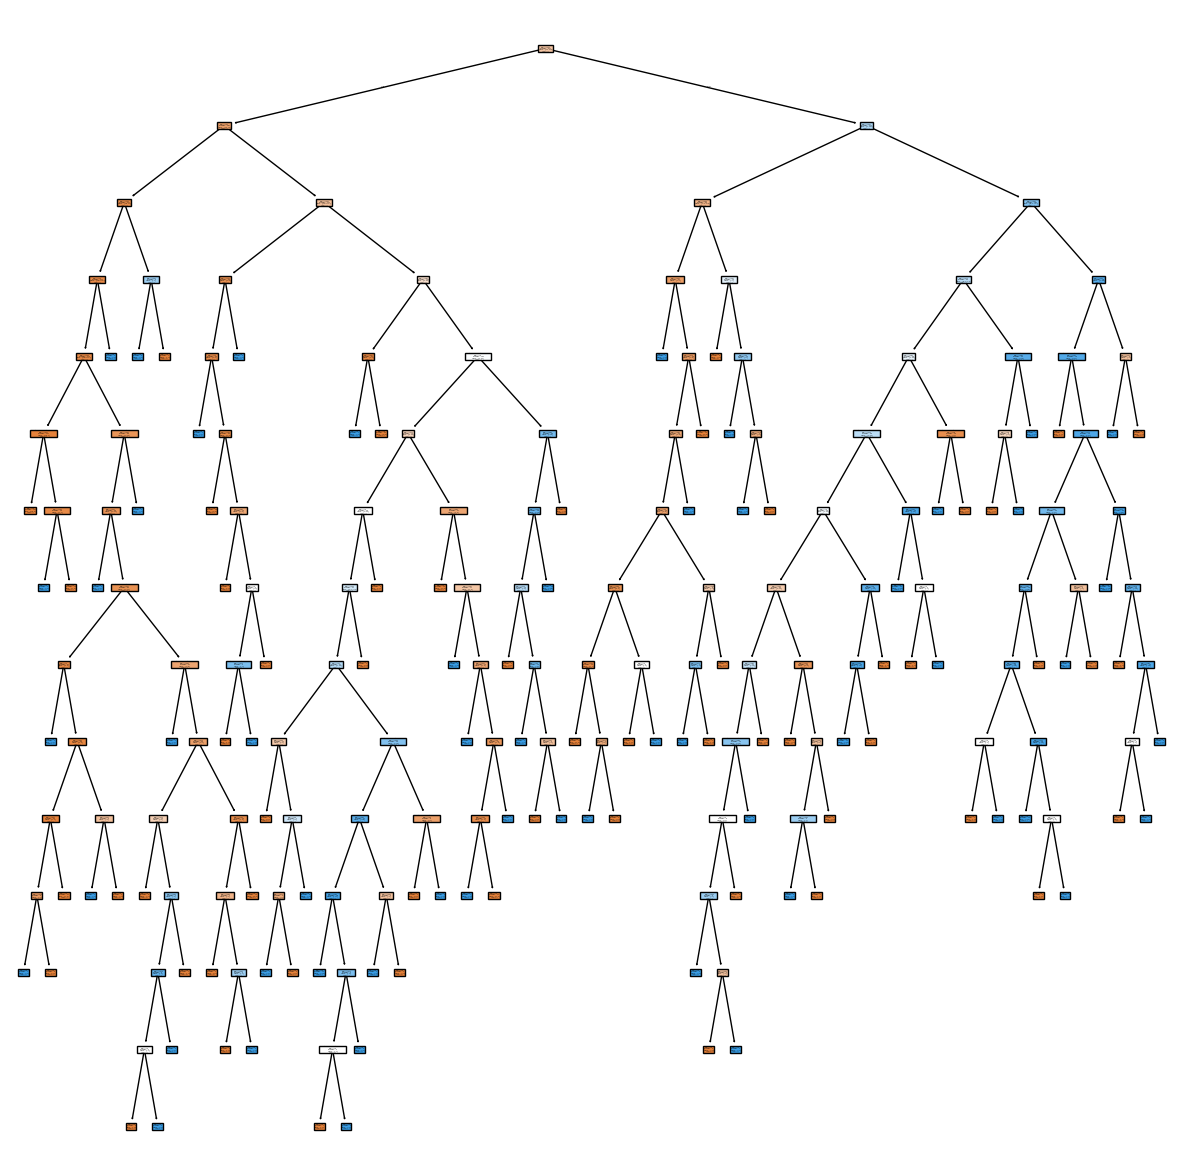

In [37]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(testing_features.columns), class_names = ["0", "1"], filled = True)
plt.show()

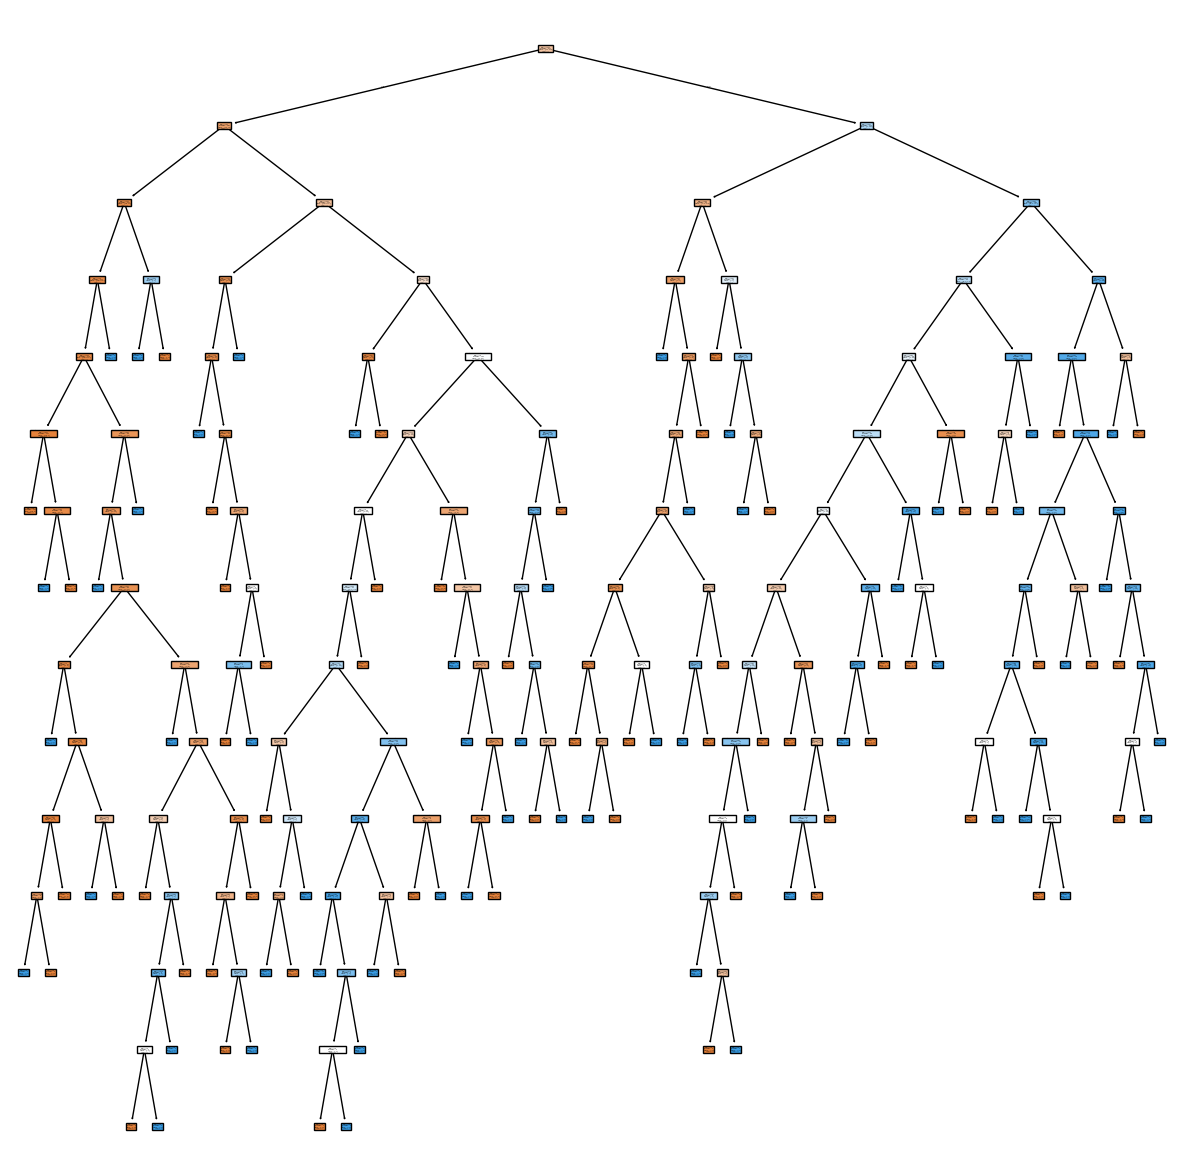

In [38]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(training_features.columns), class_names = ["0", "1"], filled = True)
plt.show()

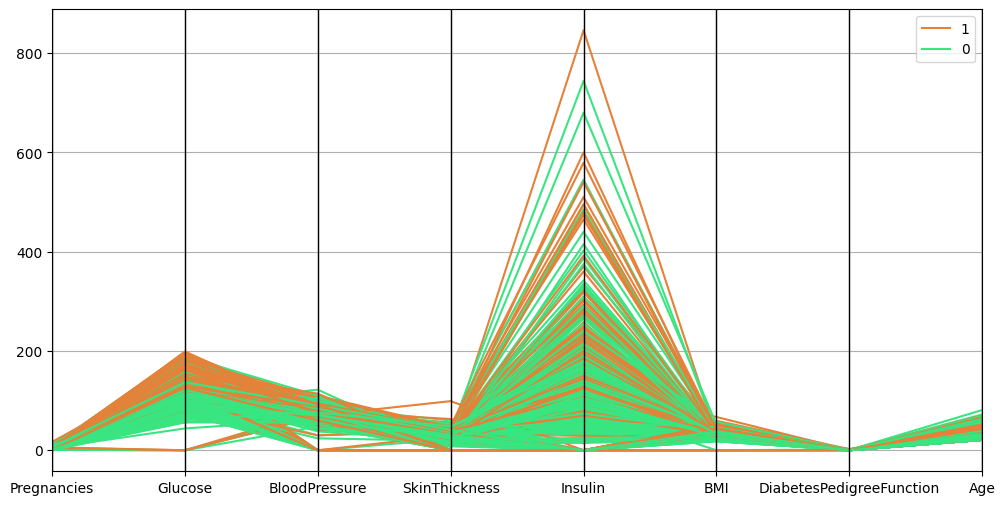

In [39]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.show()

In [40]:
columns_to_check = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

df = data_df.dropna(subset=columns_to_check) 

print(data_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

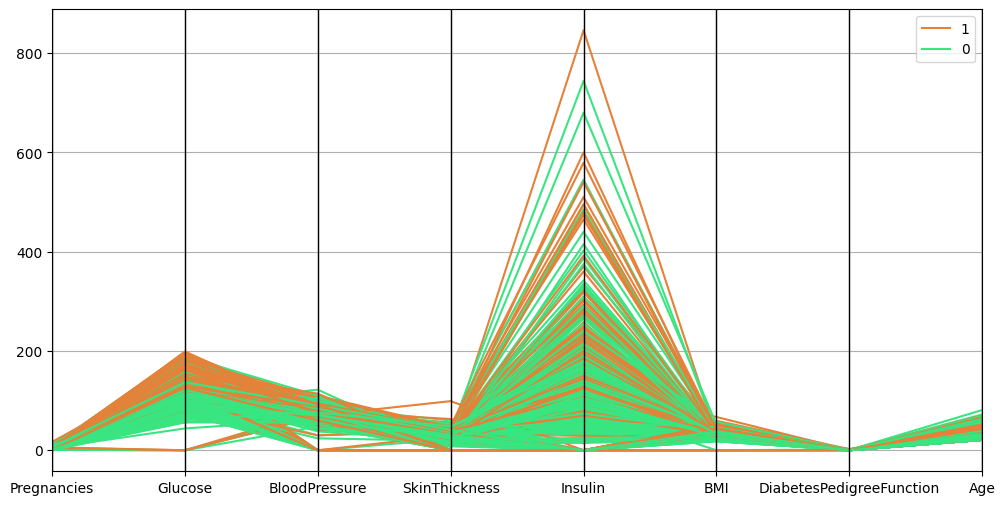

In [41]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.show()

In [43]:
print(sorted_zero_counts)

Outcome                     500
Insulin                     374
SkinThickness               227
Pregnancies                 111
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [45]:
import numpy as np
# Replace 0s with NaN and verify
data_df[columns_to_check] = data_df[columns_to_check].replace(0, np.nan)
print("\nAfter replacement:")
print(data_df)


After replacement:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  

Ok, done! Absolutely minimal decision tree classifier using ~10 statements. From here, there is **a lot** we can and should do to improve. But now we can do so incrementally, while maintaining a running state. We can also tell if anything we do 'works' in the performance sense by comparing to our baseline result of ~75% accuracy.

In [46]:
# To try
# Get rid of rows with zeros....
# Get rid of features with zeros
# Impute

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

labels = data_df['Outcome']
features = data_df.drop('Outcome', axis=1)

numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ],
    remainder='passthrough' 
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=315))  
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(training_features, training_labels)

new_model = grid_search.best_estimator_

cv_scores = cross_val_score(new_model, features, labels, cv=5)
print(f'Cross-validated accuracy: {cv_scores.mean() * 100:.1f}%')

new_model.fit(training_features, training_labels)

predicted_labels = new_model.predict(testing_features)

percent_accuracy = accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

print(classification_report(testing_labels, predicted_labels))


Cross-validated accuracy: 76.2%
Model is 78.6% accurate on the test data
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

